# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import pandas as pd
import numpy as np
dataframe = pd.read_excel("German_Credit.xlsx")

# 2. Check how many records do we have


In [2]:
dataframe.shape

(1000, 3)

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Creditability               1000 non-null int64
CreditAmount                1000 non-null int64
DurationOfCreditInMonths    1000 non-null int64
dtypes: int64(3)
memory usage: 23.6 KB


In [4]:
dataframe.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 3. Plot Histogram for column 'CreditAmount'

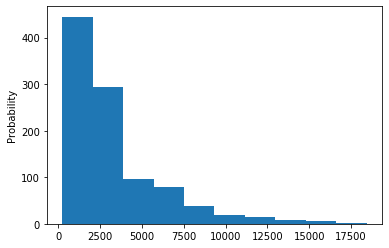

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(dataframe["CreditAmount"])
plt.ylabel('Probability');

# 3b. Create creditability dataframe

In [6]:
dataframe.Creditability.unique()

array([1, 0], dtype=int64)

In [7]:
creditDataframe = pd.DataFrame(dataframe["Creditability"])
creditDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
Creditability    1000 non-null int64
dtypes: int64(1)
memory usage: 7.9 KB


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [8]:
dataframe.groupby("Creditability").count()

,CreditAmount,DurationOfCreditInMonths
Creditability,,
0,300,300
1,700,700


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

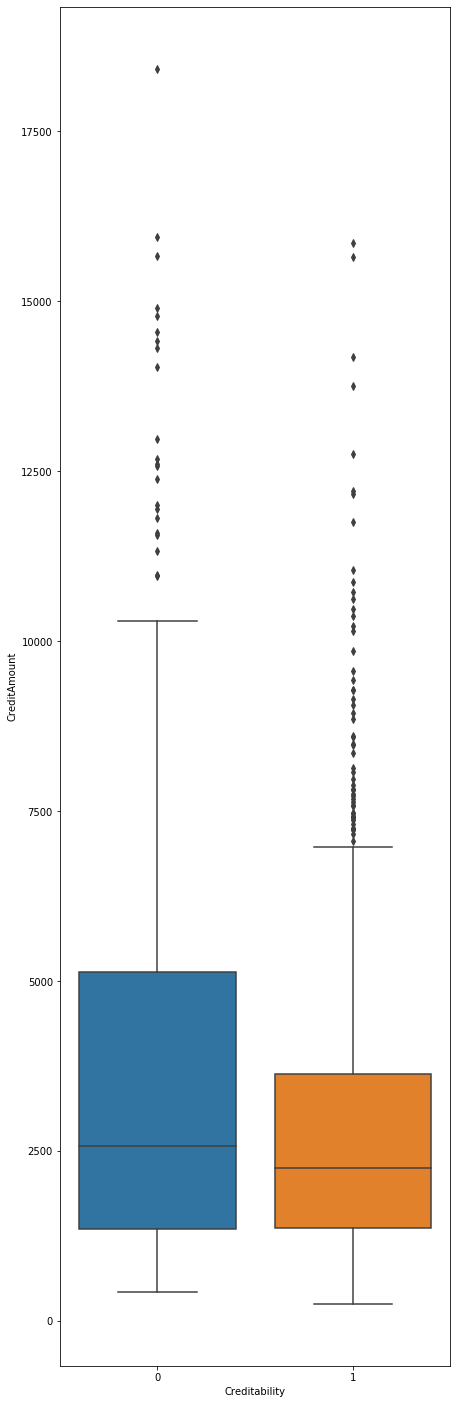

In [9]:
import seaborn as sns
plt.figure(figsize = (7,25))
sns.boxplot(x="Creditability", y="CreditAmount", data=dataframe)

# 6. Prepare input data for the model

In [10]:
from sklearn.model_selection import train_test_split

X = dataframe.drop('Creditability',axis=1)
Y = dataframe['Creditability']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [11]:
merged_train = x_train.join(y_train)
merged_train.groupby("Creditability").count()

,CreditAmount,DurationOfCreditInMonths
Creditability,,
0,209,209
1,491,491


In [12]:
merged_test = x_test.join(y_test)
merged_test.groupby("Creditability").count()

,CreditAmount,DurationOfCreditInMonths
Creditability,,
0,91,91
1,209,209


# 7. Fit logistic regression model

In [13]:
from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

# 8. Test accuracy calculation

In [14]:
model_score = model.score(x_test, y_test)
model_score

0.69

# 9. Build a confusion matrix

In [15]:
from sklearn import metrics

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
cm

array([[198,  11],
       [ 82,   9]], dtype=int64)

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults